## MEMBUAT MODEL PREDIKSI PENYEWAAN JUMLAH SEPEDA HARIAN DENGAN MENGGUNAKAN REGRESI LINIER

# Regresi

*Supervised* adalah teknik machine learning melibatkan pelatihan model untuk beroperasi pada sekumpulan *fitur* dan memprediksi *label* menggunakan himpunan data yang mencakup beberapa nilai label yang sudah diketahui. Proses pelatihan *menyesuaikan* fitur dengan label yang diketahui untuk menentukan fungsi umum yang dapat diterapkan pada fitur baru yang labelnya tidak diketahui dan memprediksinya. Kita dapat memikirkan fungsi ini seperti ini, di mana ***y*** mewakili label yang ingin kita prediksi dan ***x*** mewakili fitur yang digunakan model untuk memprediksinya.

$$y = f(x)$$

Dalam kebanyakan kasus, *x* sebenarnya adalah *vektor* yang terdiri dari beberapa nilai fitur. Fungsinya dapat diperjelas menjadi seperti ini:

$$y = f([x_1, x_2, x_3, ...]) $$

Tujuan melatih model machine learning kali ini adalah untuk menemukan fungsi yang perhitungan terhadap nilai *x* yang menghasilkan nilai *y*. *Algoritma* machine learning menyesuaikan nilai *x* ke dalam fungsi *y* yang cukup akurat untuk semua kasus dalam set data pelatihan.
 
Ada banyak algoritma machine learning untuk metode supervised dan secara garis besar dapat dibagi menjadi dua jenis, yaitu:
 
- **Algotitma Regresi**: Algoritma yang memprediksi nilai *y* yang merupakan nilai numerik seperti harga rumah atau jumlah transaksi penjualan.
 
- **Algoritma klasifikasi**: Algoritma yang memprediksi ke dalam kategori mana atau *kelas* dari sebuah observasi berada. Nilai *y* dalam model klasifikasi adalah vektor nilai probabilitas antara 0 dan 1, satu untuk setiap kelas yang menunjukkan probabilitas pengamatan milik setiap kelas.
 
Kita akan membuat model *regresi* menggunakan contoh berdasarkan studi nyata di mana data untuk skema berbagi sepeda dikumpulkan dan digunakan untuk memprediksi jumlah persewaan berdasarkan musim dan kondisi cuaca. kita akan menggunakan versi sederhana dari kumpulan data dari studi tersebut.


> **Catatan**: Data yang digunakan dalam latihan ini berasal dari [Capital Bikeshare](https: //www.capitalbikeshare.com/system-data) dan digunakan sesuai dengan [license agreement](https: //www.capitalbikeshare.com/data-license-agreement) yang dipublikasikan.

## Memuat Data
Langkah pertama dalam setiap proyek machine learning adalah memuat data yang akan kita gunakan untuk melatih model. Tujuan dari eksplorasi ini adalah untuk mencoba memahami hubungan antara atribut-atributnya; Secara khusus, setiap korelasi yang jelas antara *fitur* dan *label* yang akan coba diprediksi oleh model yang kita buat. Hal yang akan kita lakukan pada tahap awal adalah mendeteksi dan memperbaiki masalah dalam data (seperti berurusan dengan nilai yang hilang, kesalahan, atau nilai outlier), menurunkan kolom fitur baru dengan mengubah atau menggabungkan fitur yang ada (proses yang dikenal sebagai *rekayasa fitur*), *menormalkan* fitur numerik (nilai yang dapat kita ukur atau hitung) sehingga berada pada skala yang sama, dan *encoding* fitur kategoris (nilai yang mewakili kategori diskrit) sebagai indikator numerik.

Mari kita mulai dengan memuat data berbagi sepeda sebagai **pandas** DataFrame dan melihat beberapa baris pertama.

In [1]:
import pandas as pd

# Memuat training dataset
!wget https: //raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

--2022-10-25 12:33:40--  ftp://https/
           => '.listing'
Resolving https (https)... failed: No such host is known. .
wget: unable to resolve host address 'https'
//raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv: Scheme missing.


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


Data terdiri dari kolom berikut:
 
- **instant**: Pengidentifikasi baris unik
- **dteday**: Tanggal saat data diamati - dalam hal ini, data dikumpulkan setiap hari; jadi ada satu baris per tanggal.
- **season**: Nilai yang dikodekan secara numerik yang menunjukkan musim (1:  musim dingin, 2:  musim semi, 3:  musim panas, 4:  musim gugur)
- **yr**: Tahun studi saat pengamatan dilakukan ( penelitian berlangsung selama dua tahun - tahun 0 mewakili 2011, dan tahun 1 mewakili 2012)
- **mnth**: Bulan kalender di mana pengamatan dilakukan (1: Januari ... 12: Desember)
- **holiday**: Nilai biner yang menunjukkan apakah pengamatan dilakukan pada hari libur atau tidak)
- **weekday**: Hari dalam seminggu pengamatan dilakukan (0: Minggu ... 6: Sabtu)
- **workingday**: Nilai biner yang menunjukkan apakah hari tersebut adalah hari kerja atau bukan (bukan akhir pekan atau hari libur)
- **weathersit**: Nilai kategoris yang menunjukkan situasi cuaca (1: cerah, 2: kabut/awan, 3: hujan ringan/salju, 4: hujan lebat/hujan es/salju/kabut)
- **temp**: Suhu dalam celsius (dinormalisasi)
- **atemp**: Suhu nyata ("terasa seperti") dalam celsius (dinormalisasi)
- **hum**: Tingkat kelembapan (dinormalisasi)
- **windspeed**: Kecepatan angin (dinormalisasi)
- **rentals**: Jumlah rental sepeda yang tercatat.
 
Dalam kumpulan data ini, **rentals** mewakili label (nilai *y*) model kita harus dilatih untuk memprediksi. Kolom lainnya adalah fitur potensial (*x*).
 
Seperti disebutkan sebelumnya, kita dapat melakukan beberapa *rekayasa fitur* untuk menggabungkan atau memperoleh fitur baru. Misalnya, mari tambahkan kolom baru bernama **hari** ke kerangka data dengan mengekstrak komponen hari dari **dteday** . Kolom baru mewakili hari dalam sebulan dari 1 hingga 31.


In [2]:
# menambahkan kolom 'day' menggunakan datarame .DatetimeIndex dari library pandas
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(31)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


Oke, mari kita mulai analisis data kita dengan memeriksa beberapa statistik deskriptif utama. Kita dapat menggunakan metode dataframe **describe** untuk menghasilkan ini untuk fitur numerik serta kolom label **rentals**.

In [3]:
# analisis menggunakan statistika deskriptif pada bagian temp, atemp, hum, windspeed, & rentals
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


Statistika deskriptif mengungkapkan beberapa informasi tentang distribusi data di masing-masing bidang numerik, termasuk jumlah pengamatan (ada 731 catatan), rata-rata, simpangan baku, nilai minimum dan maksimum, dan nilai kuartil (nilai ambang batas untuk 25%, 50% - yang juga merupakan median, dan 75% dari data). Dari sini, kita dapat melihat bahwa jumlah rata-rata sewa harian adalah sekitar 848; tetapi ada standar deviasi yang relatif besar, menunjukkan banyak perbedaan dalam jumlah sewa per hari.

Kita mungkin mendapatkan gambaran yang lebih jelas tentang distribusi nilai sewa dengan memvisualisasikan data. Jenis plot umum untuk memvisualisasikan distribusi data numerik adalah histogram dan plot kotak, jadi mari kita gunakan Library matplotlib Python untuk membuat salah satu dari masing-masing untuk kolom rental.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10404\2416096785.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


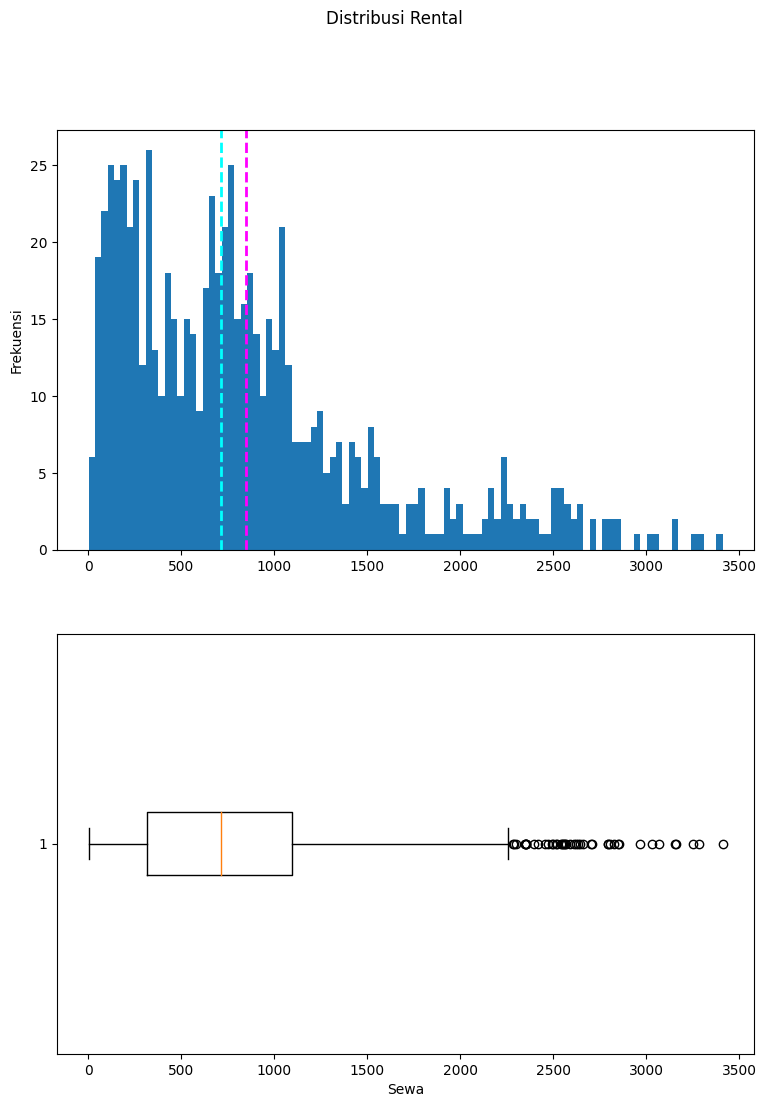

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Ini memastikan plot ditampilkan sebaris di notebook Jupyter
%matplotlib inline

# Dapatkan kolom label
label = bike_data['rentals']

# Buat gambar untuk 2 subplot (2 baris, 1 kolom)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frekuensi')

# Tambahkan garis untuk mean, median, dan mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Sewa')

# Tambahkan judul ke Gambar
fig.suptitle('Distribusi Rental')

# Tampilkan gambarnya
fig.show()

Plot menunjukkan bahwa jumlah sewa harian berkisar dari 0 hingga lebih dari 3,400. **Namun**, jumlah rata-rata (dan median) sewa harian **lebih dekat ke batas bawah kisaran**, dengan sebagian besar data antara 0 dan sekitar 2,200 sewa. Beberapa nilai di atas ini ditunjukkan dalam plot kotak sebagai lingkaran kecil, menunjukkan bahwa mereka adalah **outlier** - dengan kata lain, nilai yang luar biasa tinggi atau rendah di luar rentang khas sebagian besar data.

Kita dapat melakukan eksplorasi visual yang sama dari fitur numerik. Mari kita buat histogram untuk masing-masing.

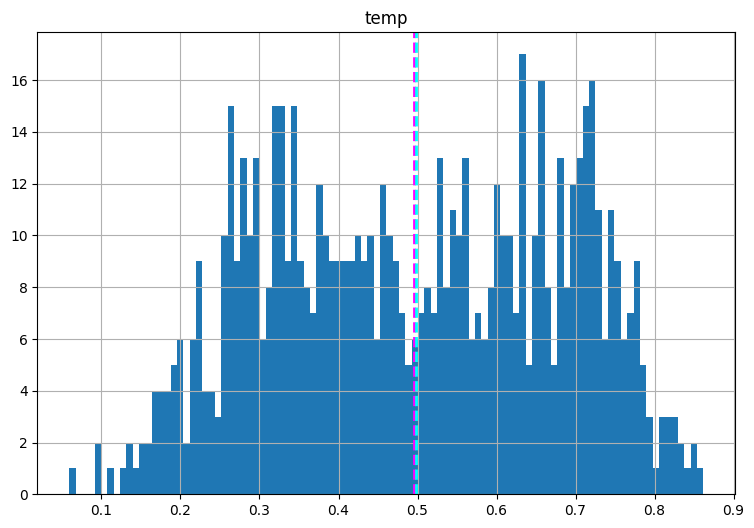

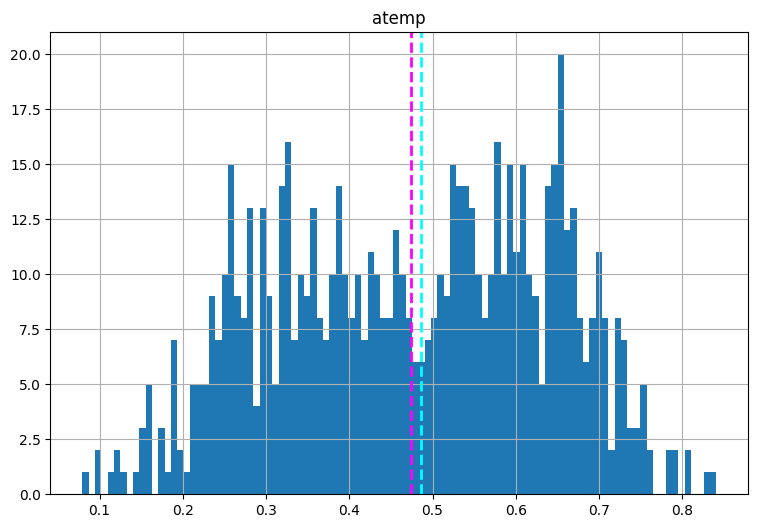

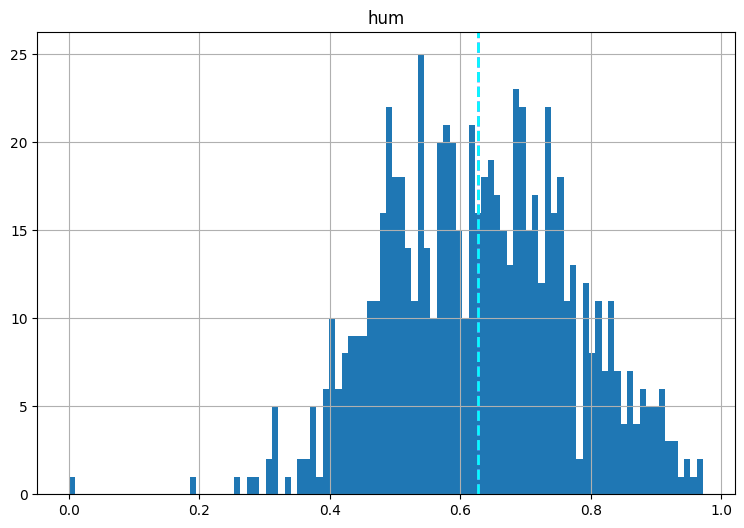

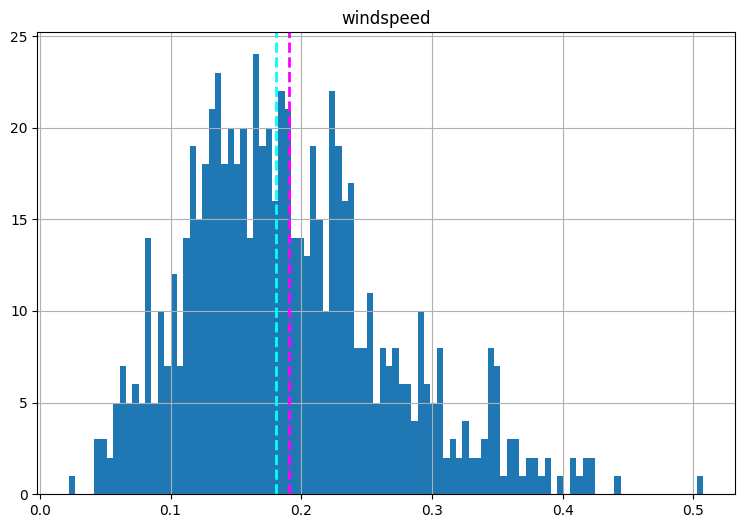

In [5]:
# Plot histogram untuk setiap fitur numerik
for col in numeric_features: 
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Fitur numerik tampaknya lebih terdistribusi secara "normal" dengan rata-rata dan median lebih dekat di tengah rentang nilai yang bertepatan dengan nilai yang paling banyak terkumpul.

> **Catatan**:  Distribusi tidak benar-benar normal dalam arti statistika di mana data yang dihasilkan membentuk histogram "kurva lonceng" simetris yang halus dengan rata-rata dan mode (nilai paling umum) di tengah; tetapi umumnya menunjukkan bahwa sebagian besar pengamatan memiliki nilai tengah.

Kita telah memuat distribusi nilai numerik dalam himpunan data, tetapi bagaimana dengan fitur kategorisnya? dikarenakan data dari fitur kategoris ini bukanlah angka yang kontinu dalam skala atau data ini memiliki nilai yang sudah ditetapkan sehingga kita tidak dapat menggunakan histogram untuk memvisualisasikannya. Maka kita dapat memplot diagram batang yang menunjukkan jumlah setiap nilai diskrit untuk setiap kategori.

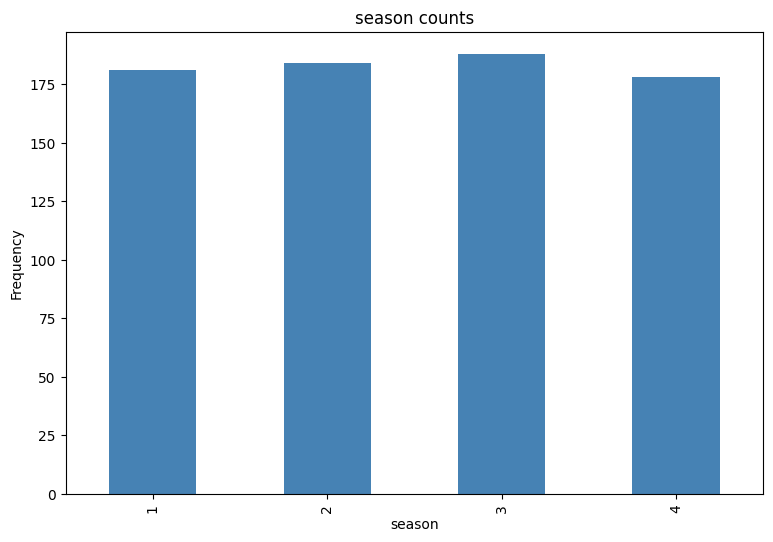

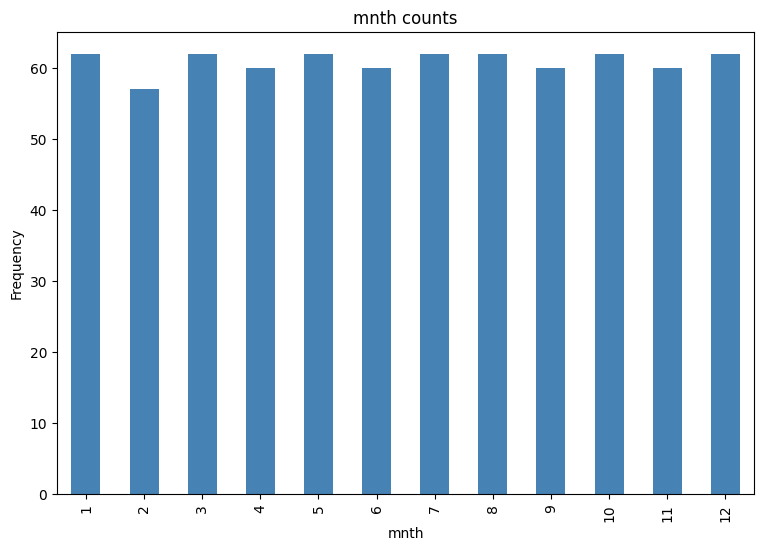

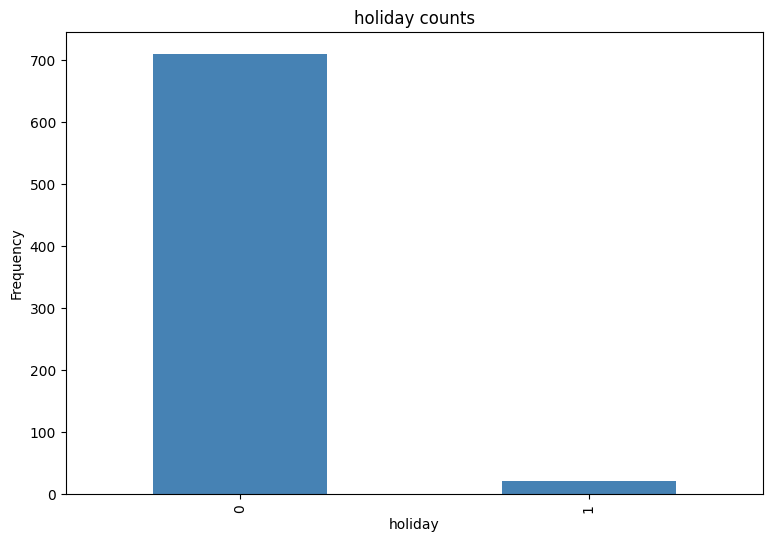

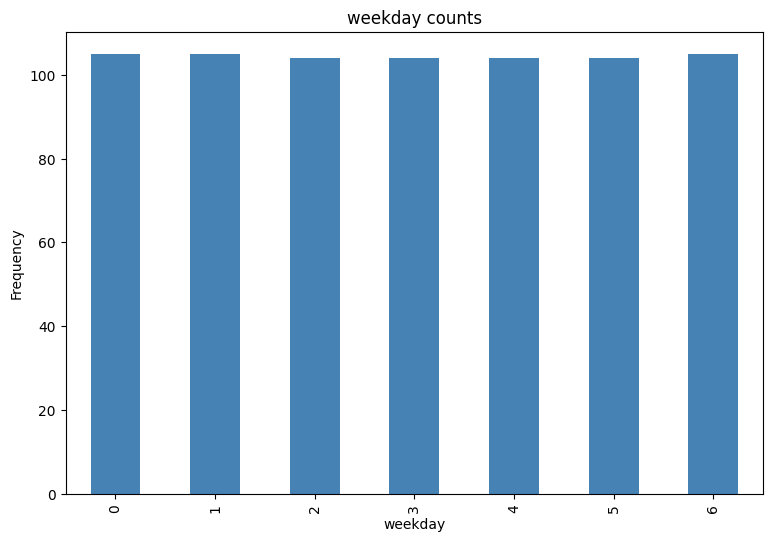

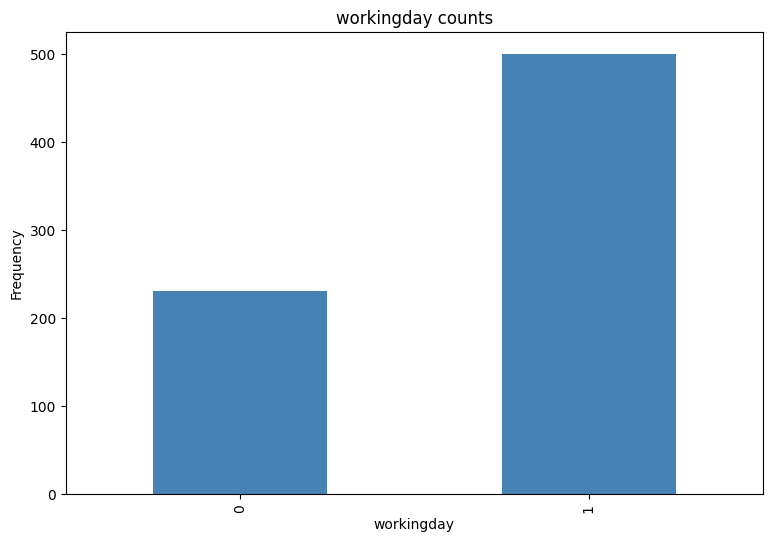

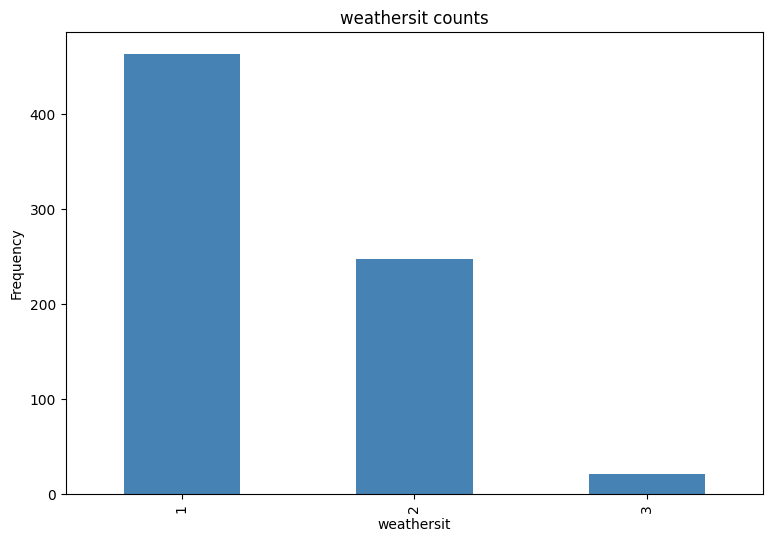

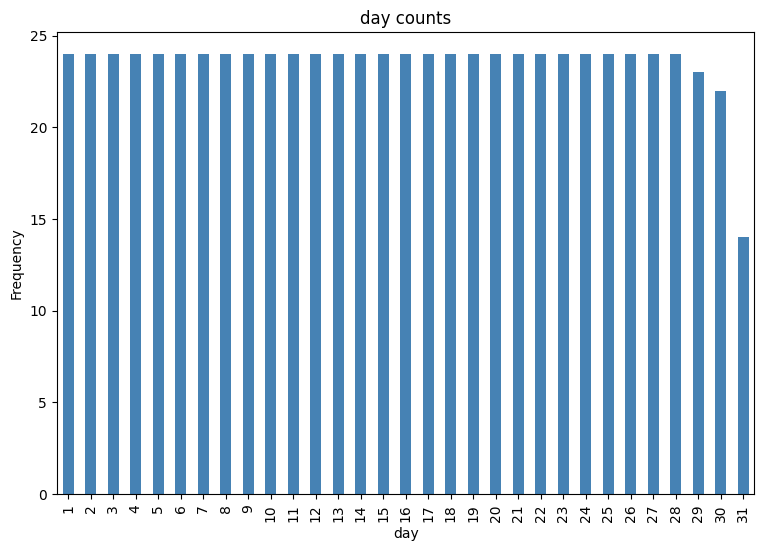

In [6]:
import numpy as np

# Plot Plot Batang untuk setiap jumlah fitur kategoris
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features: 
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Banyak fitur kategoris menunjukkan distribusi yang kurang lebih seragam (artinya ada jumlah baris yang kira-kira sama untuk setiap kategori). Pengecualian pada: 

**holiday**:  Ada lebih sedikit hari yang merupakan hari libur daripada hari yang tidak.

**workingday**:  Ada lebih banyak hari kerja daripada hari non-kerja.

**weathersit**:  Sebagian besar hari adalah kategori 1 (cerah), dengan kategori 2 (kabut dan awan) yang paling umum berikutnya. Ada relatif sedikit hari kategori 3 (hujan ringan atau salju), dan tidak ada hari kategori 4 (hujan lebat, hujan es, atau kabut) sama sekali.

Sekarang setelah kita mengetahui sesuatu tentang distribusi data di kolom kita, kita dapat mulai mencari hubungan antara fitur dan label persewaan yang ingin kita prediksi.

Untuk fitur numerik, kita dapat membuat plot scatter yang menunjukkan persimpangan nilai fitur (temp, atemp, hum, dan windspeed) dan label. Kita juga dapat menghitung statistik korelasi untuk mengukur hubungan yang tampak..

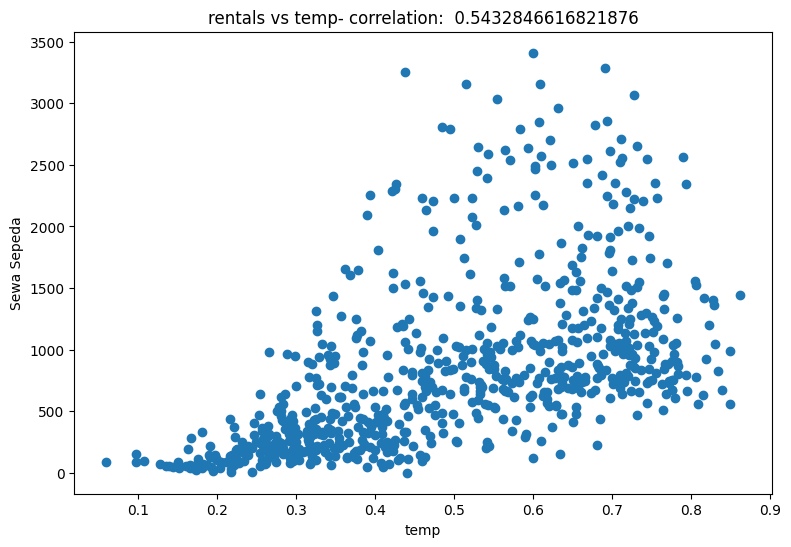

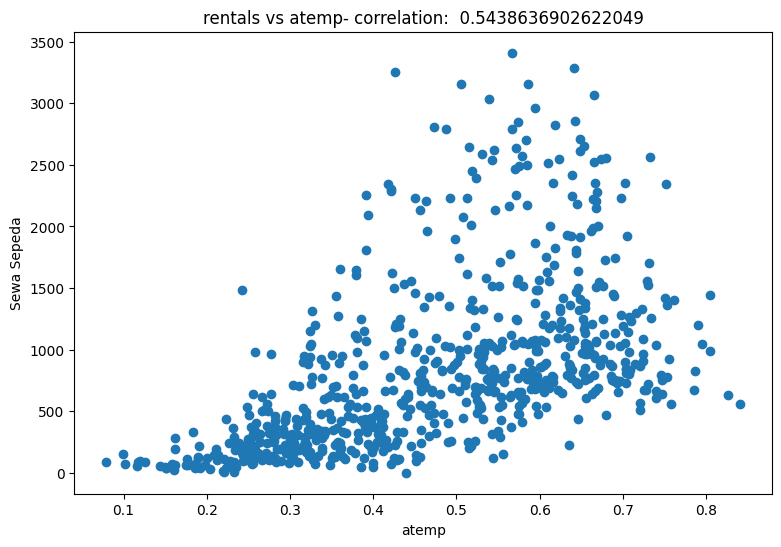

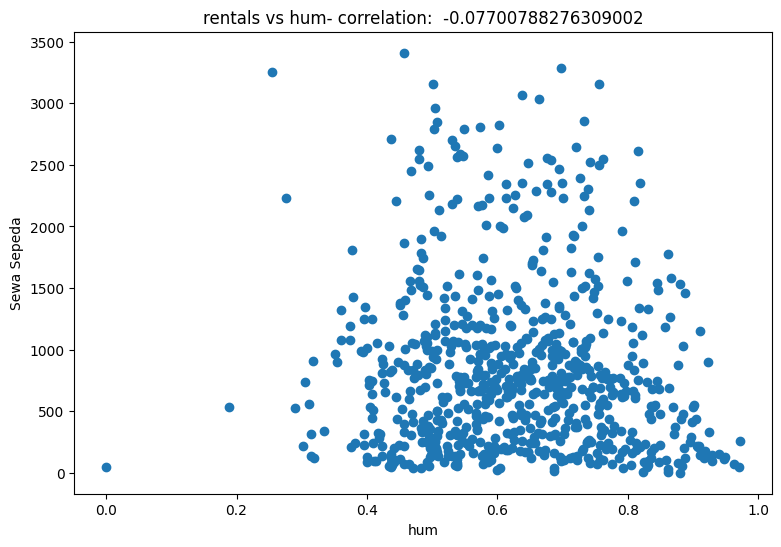

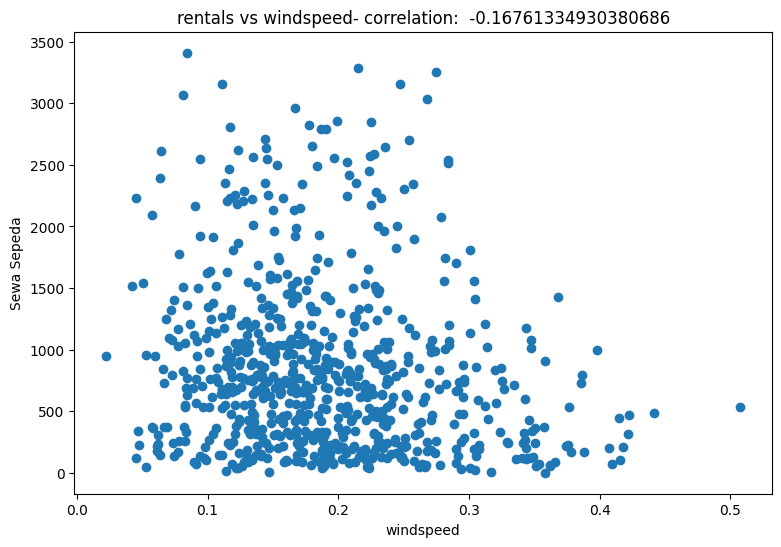

In [7]:
for col in numeric_features: 
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']

    # masukkan parameter .corr dari library pandas untuk analisis korelasi
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sewa Sepeda')
    ax.set_title('rentals vs ' + col + '- correlation:  ' + str(correlation))
plt.show()

Hasil dari persebaran data tidak membentuk tren yang sempurna, tetapi jika kita lihat lebih dekat lagi pada grafik plot scatter temp dan atemp, kita dapat melihat tren diagonal samar yang menunjukkan bahwa jumlah sewa yang lebih tinggi berkorelasi dengan suhu yang lebih tinggi dengan nilai korelasi yang cukup kuat yaitu > 0,5. Sebaliknya, plot untuk hum dan windspeed menunjukkan korelasi negatif atau bergerak berlawanan arah yang menunjukkan bahwa lebih sedikit sewa pada hari dengan kelembaban tinggi atau kecepatan angin tinggi.

Sekarang mari kita bandingkan fitur kategoris dengan label (bike rentals). kita akan melakukan ini dengan membuat grafik plot kotak yang menunjukkan distribusi jumlah sewa untuk setiap kategori.

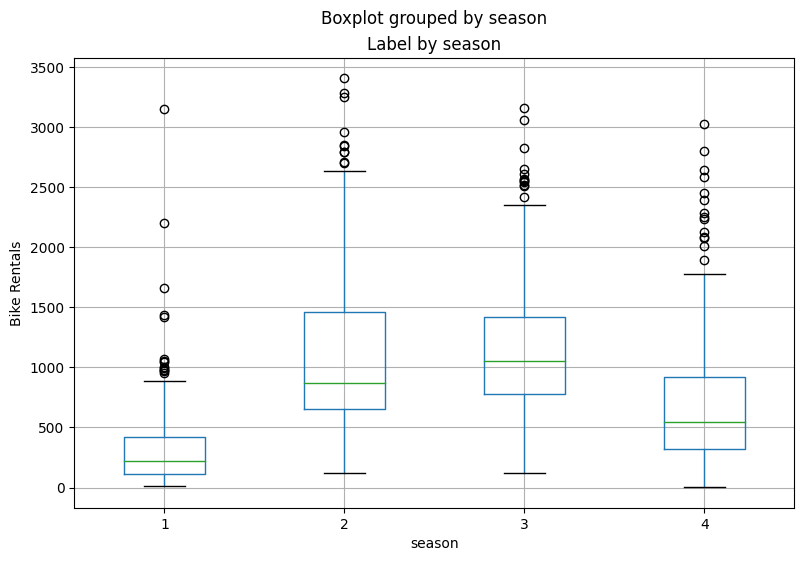

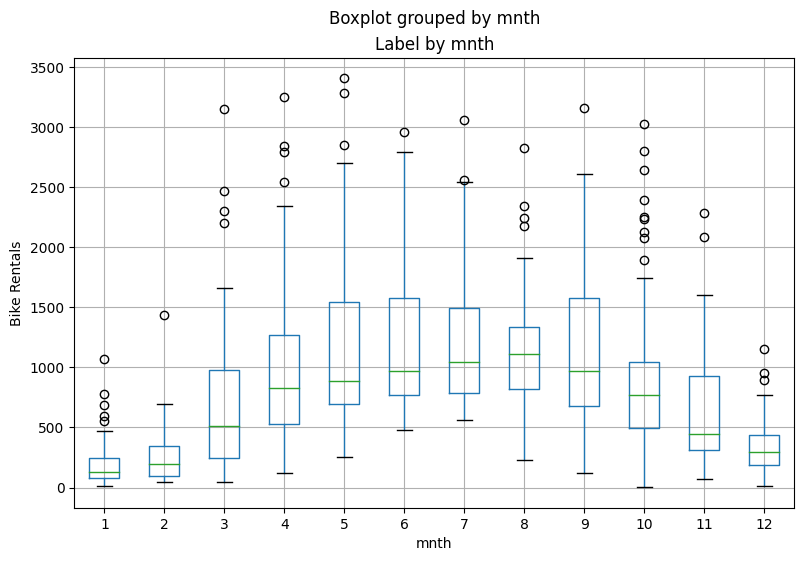

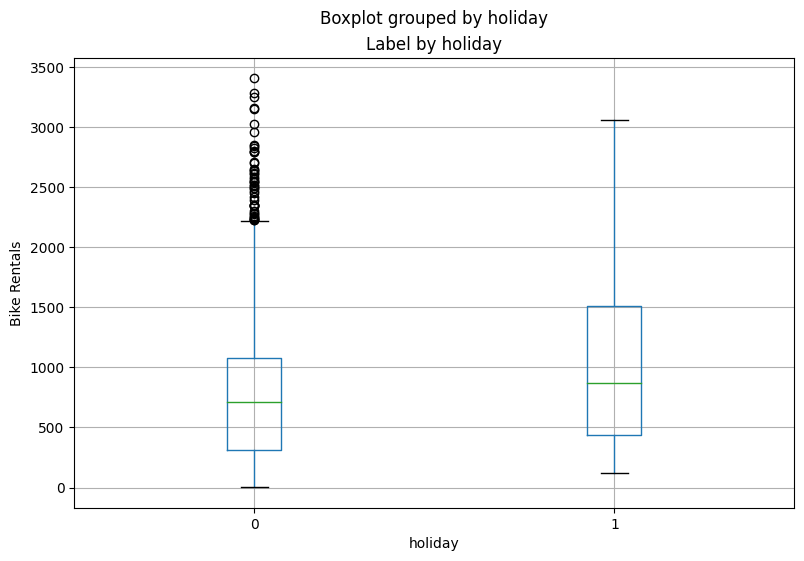

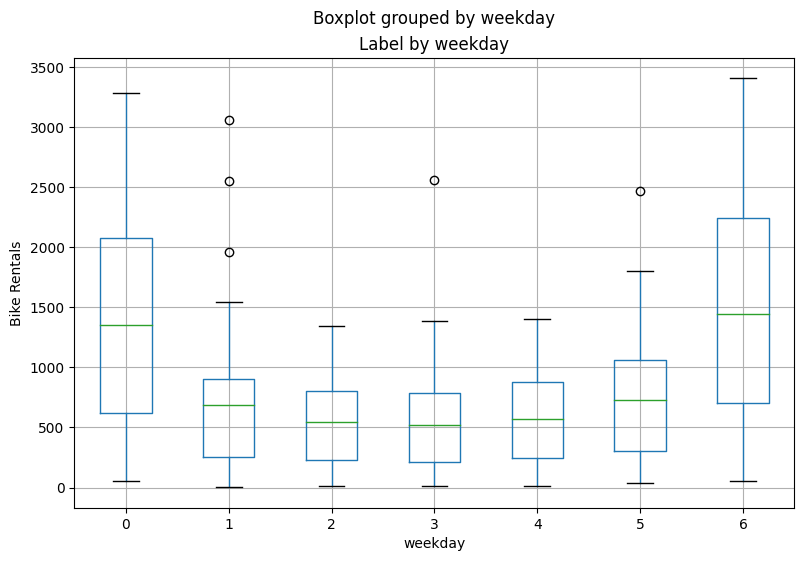

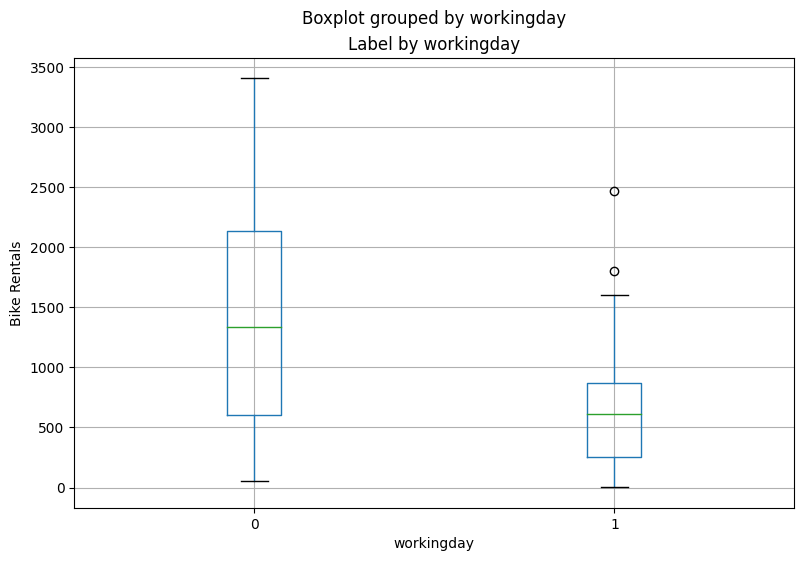

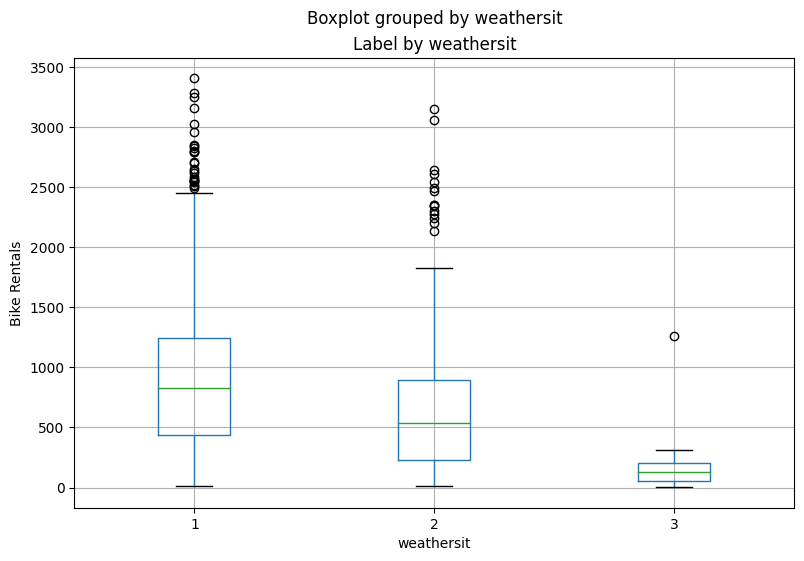

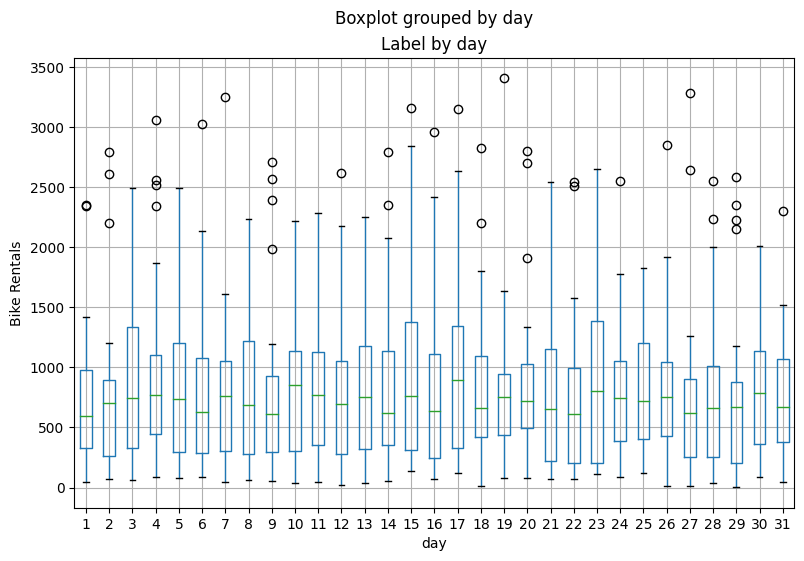

In [8]:
# Plot BoxPlot untuk label dengan setiap fitur kategoris
for col in categorical_features: 
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

Plot menunjukkan beberapa varians dalam hubungan antara beberapa nilai kategori dan persewaan. Misalnya, ada perbedaan yang jelas dalam distribusi sewa pada akhir pekan (hari kerja 0 atau 6) dan selama minggu kerja (hari kerja 1 hingga 5). Demikian pula, ada perbedaan mencolok untuk kategori liburan dan hari kerja. Ada tren nyata yang menunjukkan distribusi sewa yang berbeda di bulan-bulan musim semi dan musim panas dibandingkan dengan bulan-bulan musim dingin dan musim gugur. Kategori weathersit juga tampaknya membuat perbedaan dalam distribusi sewa. Fitur hari demi hari dalam sebulan menunjukkan sedikit variasi, menunjukkan bahwa itu mungkin tidak memprediksi jumlah penyewaan.

## Membuat Model Regresi

Sekarang setelah kita memuat data, saatnya menggunakannya untuk melatih model regresi yang menggunakan fitur yang telah kita identifikasi sebagai berpotensi prediktif untuk memprediksi label **rentals**.  Hal pertama yang perlu kita lakukan adalah memisahkan fitur yang ingin kita gunakan untuk melatih model dari label yang kita inginkan untuk diprediksi.

In [9]:
# Pemisahan Fitur dan label
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features: ',X[: 10], '\nLabels: ', y[: 10], sep='\n')

Features: 
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.       

Setelah memisahkan himpunan data, kita sekarang memiliki array numpy bernama **X** yang berisi fitur, dan **y** yang berisi label ataua jumlah sewa (rentals).

Kita *bisa* melatih model menggunakan semua data; tetapi itu adalah praktik umum dalam supervised learning untuk membagi data menjadi dua subset; set (biasanya lebih besar) untuk melatih model, dan set "tahan" yang lebih kecil untuk memvalidasi model terlatih. Hal ini memungkinkan kita untuk mengevaluasi seberapa baik kinerja model saat digunakan dengan himpunan data validasi dengan membandingkan label yang diprediksi dengan label yang diketahui. Penting untuk membagi data *secara acak* (daripada mengatakan, mengambil 70% data pertama untuk pelatihan dan menyimpan sisanya untuk validasi). Ini membantu memastikan bahwa kedua subset data sebanding secara statistik (jadi kita memvalidasi model dengan data yang memiliki distribusi statistik yang serupa dengan data yang dilatih).


Untuk membagi data secara acak, kita akan menggunakan fungsi **train_test_split** di library **scikit-learn**. Library ini adalah salah satu paket Machine Learning yang paling banyak digunakan untuk Python.

In [10]:
from sklearn.model_selection import train_test_split

# Pemisahan data 70%-30% menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


Sekarang kita memiliki empat himpunan data berikut: 

- **X_train**:  Nilai fitur yang akan kita gunakan untuk melatih model
- **y_train**:  Label yang sesuai akan kita gunakan untuk melatih model
- **X_test**:  Nilai fitur yang akan kita gunakan untuk memvalidasi model
- **y_test**:  Label yang sesuai akan kita gunakan untuk memvalidasi model

Sekarang kita siap untuk melatih model dengan menyesuaikan algoritma regresi yang sesuai dengan data pelatihan. Kita akan menggunakan algoritma *linear regression*, titik awal umum untuk regresi yang bekerja dengan mencoba menemukan hubungan linier antara nilai *X* dan label *y*. Model yang dihasilkan adalah fungsi yang secara konseptual mendefinisikan garis di mana setiap kombinasi nilai X dan y yang mungkin berpotongan.

Dalam Scikit-Learn, algoritma pelatihan dienkapsulasi dalam *estimator*, dan dalam hal ini kita akan menggunakan estimator **LinearRegression** untuk melatih model regresi linier.

In [11]:
# Jalankan model
from sklearn.linear_model import LinearRegression

# Menyesuaikan model regresi linier pada training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


### Evaluasi Trained Model

Sekarang setelah kita melatih model, kita dapat menggunakannya untuk memprediksi jumlah sewa untuk fitur yang kita tahan dalam himpunan data validasi kita. Kemudian kita dapat membandingkan prediksi ini dengan nilai label aktual untuk mengevaluasi seberapa baik atau tidak model tersebut bekerja.

In [12]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
def new_func(predictions):
    return np.round(predictions)

print('Predicted labels: ', new_func(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


Membandingkan setiap prediksi dengan nilai aktual "kebenaran dasar" yang sesuai bukanlah cara yang sangat efisien untuk menentukan seberapa baik model memprediksi. Mari kita lihat apakah kita bisa mendapatkan indikasi yang lebih baik dengan memvisualisasikan plot sebar yang membandingkan prediksi dengan label yang sebenarnya. kita juga akan menarik garis tren untuk mendapatkan gambaran umum tentang seberapa baik label yang diprediksi selaras dengan label yang sebenarnya.

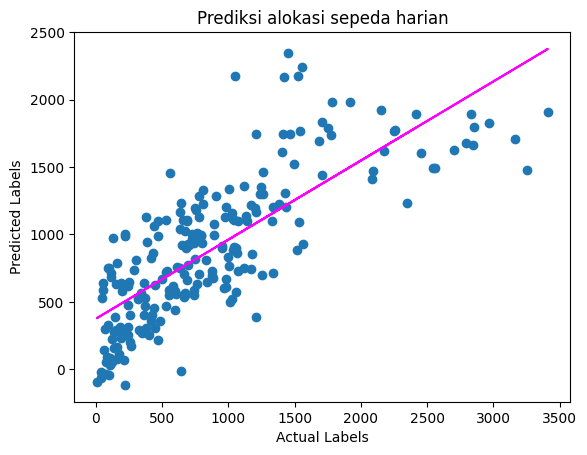

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Prediksi alokasi sepeda harian')

# overlay garis regresi
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Ada tren diagonal positif dan perpotongan antara nilai prediksi dengan nilai aktual yang mengikuti jalur garis tren; tetapi ada cukup banyak perbedaan antara fungsi ideal yang diwakili oleh garis dan hasilnya. Varians ini mewakili *sisa* model - dengan kata lain, perbedaan antara label yang diprediksi saat model menerapkan koefisien yang dipelajarinya selama pelatihan ke data validasi, dan nilai sebenarnya dari label validasi. Residu ini ketika dievaluasi dari data validasi menunjukkan tingkat *eror* ketika model digunakan dengan data baru yang labelnya tidak diketahui.
 
Kita dapat mengukur residu dengan menghitung sejumlah metrik evaluasi yang umum digunakan. kita akan fokus pada tiga berikut:
 
- **Mean Square Error (MSE)**: Rata-rata perbedaan kuadrat antara nilai prediksi dan nilai aktual. Ini menghasilkan metrik relatif di mana semakin kecil nilainya, semakin baik kecocokan model
- **Root Mean Square Error (RMSE)**: Akar kuadrat dari MSE. Ini menghasilkan metrik absolut dalam unit yang sama dengan label (dalam hal ini, jumlah persewaan). Semakin kecil nilainya, semakin baik modelnya (dalam arti sederhana, ini mewakili jumlah rata-rata rental yang prediksinya salah!)
- **Koefisien Determinasi (biasanya dikenal sebagai *R-kuadrat* atau R<sup> 2</sup>**): Metrik relatif di mana semakin tinggi nilainya, semakin baik kecocokan model. Intinya, metrik ini mewakili seberapa besar varians antara nilai label yang diprediksi dan aktual yang dapat dijelaskan oleh model.
 
Mari gunakan Scikit-Learn untuk menghitung metrik ini untuk model kita, berdasarkan prediksi yang dihasilkan untuk data validasi.



In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035592
RMSE: 449.4135728595165
R2: 0.6040454736919191


## Eksperimen dengan Algoritma lain
 
Regresi linier yang kita gunakan terakhir kali untuk melatih model memiliki beberapa kemampuan prediksi, tetapi ada banyak jenis algoritma regresi yang bisa kita coba, yaitu:
 
- **Algoritma linier**: Bukan hanya algoritma Regresi Linier yang di atas (secara teknis merupakan *Kuadrat Terkecil Biasa*), tetapi varian lain seperti *Lasso* dan *Ridge*.
- **Tree-based algorithms**: Algoritma yang membangun pohon keputusan untuk mencapai prediksi.
- **Ensemble algorithms**: Algoritma yang menggabungkan output dari beberapa algoritma dasar untuk meningkatkan kemampuan generalisasi.
 
> **Catatan**: Untuk daftar lengkap estimator Scikit-Learn yang merangkum algoritma untuk supervised machine learning, lihat [dokumentasi Scikit-Learn](https://scikit-learn.org/stable/supervised_learning.html). Ada banyak algoritma yang dapat dipilih, tetapi untuk sebagian besar skenario dunia nyata, [Scikit-Learn estimator cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) dapat membantu kita menemukan titik awal yang cocok. 
 
### Mencoba Algoritma Linear Lain
 
Mari kita coba melatih model regresi kita dengan menggunakan **Lasso** algoritma Kita dapat melakukan ini hanya dengan mengubah estimator dalam kode pelatihan.

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


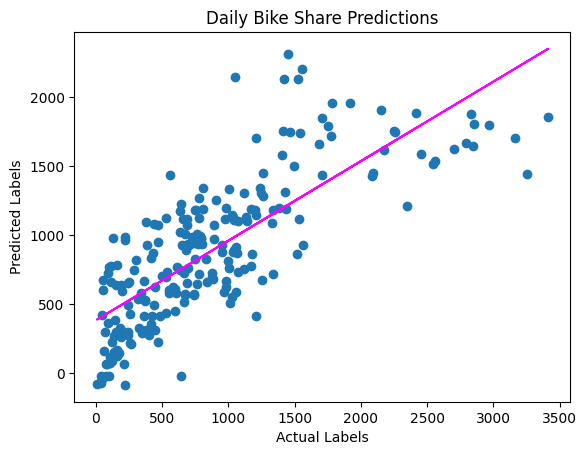

In [15]:
from sklearn.linear_model import Lasso

# Sesuaikan model lasso pada set pelatihan
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluasi model menggunakan data pengujian
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot diprediksi vs aktual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# Overlay garis regresi
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Mencoba Algoritma Decision Tree

Sebagai alternatif dari model linier, ada kategori algoritma untuk machine learning yang menggunakan pendekatan berbasis pohon di mana fitur dalam himpunan data diperiksa dalam serangkaian evaluasi, yang masing-masing menghasilkan *cabang* dalam *decision tree* berdasarkan nilai fitur. Di akhir setiap seri cabang adalah simpul daun dengan nilai label yang diprediksi berdasarkan nilai fitur.

Mari kita latih model regresi Pohon Keputusan menggunakan data penyewaan sepeda. Setelah melatih model, kode di bawah ini akan mencetak definisi model dan representasi teks dari pohon yang digunakannya untuk memprediksi nilai label.

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Jalankan model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualisasikan model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_9 <= 0.33
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_9 >  0.33
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |   |--- feature_6 <= 0.30
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |   |   |   |--- feature_6 >  0.30
|   |   |   |   |   |   |   |--- val

Evaluasikan tree-based model yang sudah dibuat

MSE: 273299.4727272727
RMSE: 522.7805206080968
R2: 0.4642135369886301


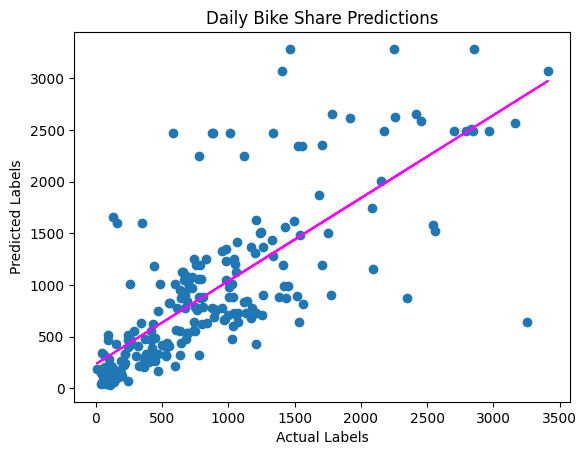

In [17]:
# Evaluasikan model menggunakan test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Visualisasikan grafik plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# Overlay garis regresi
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Model tree-based tampaknya tidak mengalami peningkatan dibandingkan model linier, jadi apa lagi yang bisa kita coba?

### Mencoba Algoritma Ensemble

Algoritma Ensemble bekerja dengan menggabungkan beberapa estimator (algoritma) dasar untuk menghasilkan model yang optimal, baik dengan menerapkan fungsi agregat ke kumpulan model dasar (kadang-kadang disebut *mengantongi*) atau dengan membangun urutan model yang dibangun satu sama lain untuk meningkatkan kinerja prediktif (disebut sebagai *boosting*).

Langkah pertama, mari kita coba model Random Forest yang menerapkan fungsi rata-rata ke beberapa model Decision Tree untuk model keseluruhan yang lebih baik.

RandomForestRegressor() 

MSE: 107925.26365227273
RMSE: 328.5198070927729
R2: 0.7884192943924023


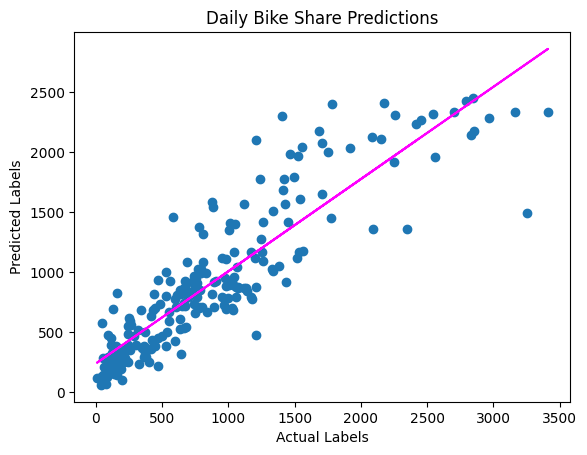

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Jalankan model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluasi model menggunakan test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Visualisasikan dengan grafik plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# overlay garis regresi
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Untuk perhitungan yang lebih baik, mari kita coba *boosting* algoritma ensemble. Kita akan menggunakan estimator Gradient Boosting seperti algoritma Random Forest dengan membangun banyak pohon secara independen dan mengambil hasil rata-rata pada setiap pohon yang dibangun di atas output yang sebelumnya dalam upaya untuk mengurangi *loss* (kesalahan) secara bertahap di dalam model.

GradientBoostingRegressor() 

MSE: 104469.32025368286
RMSE: 323.2171410270236
R2: 0.7951944545177412


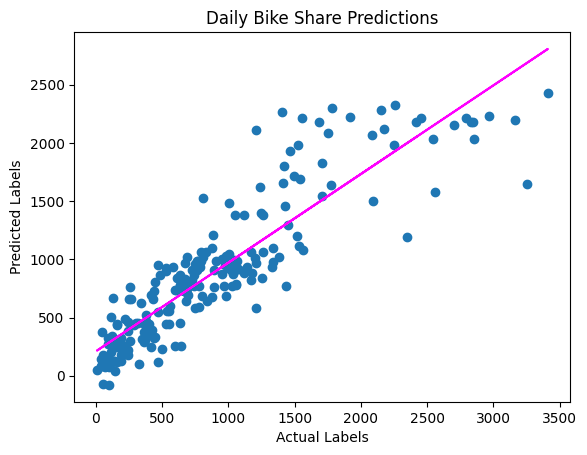

In [19]:
# Jalankan model
from sklearn.ensemble import GradientBoostingRegressor

# Menyesuaikan model laso pada set pelatihan
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluasi model menggunakan test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# visualisasikan dengan grafik plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# overlay garsi regresi
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Optimasi Hyperparameter
 
Mari kita lihat pada estimator **GradientBoostingRegressor** pada output di atas dan perhatikan. Seperti estimator yang kita coba sebelumnya, **GradientBoostingRegressor** menyertakan sejumlah besar parameter yang mengontrol model yang dijalankan. Dalam machine learning, istilah *parameter* mengacu pada nilai yang dapat ditentukan dari data lalu untuk nilai yang kita tentukan untuk mempengaruhi perilaku algoritma pelatihan disebut sebagai *hyperparameter*.
 
Hyperparameter spesifik untuk digunakan sebagai estimator yang bervariasi berdasarkan algoritma yang dienkapsulasi oleh estimator. Dalam kasus **GradientBoostingRegressor** , algoritma adalah ensemble yang menggabungkan beberapa pohon keputusan untuk membuat model prediktif secara keseluruhan. kita dapat mempelajari tentang hyperparameter untuk estimator ini di [dokumentasi Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).
 
Kita tidak akan membahas secara detail setiap hyperparameter di sini, tetapi setiap hyperparameter bekerja beriringan mempengaruhi cara algoritma melatih model. Dalam banyak kasus, nilai default yang disediakan oleh Scikit-Learn akan bekerja dengan baik; tetapi mungkin ada beberapa keuntungan dalam memodifikasi hyperparameter untuk mendapatkan kinerja prediktif yang lebih baik atau mengurangi waktu pelatihan.
 
Jadi bagaimana kita tahu nilai hyperparameter apa yang harus kita gunakan? Nah, jika tidak ada pemahaman mendalam tentang cara kerja algoritma yang mendasarinya, kita perlu bereksperimen. Untungnya, SciKit-Learn menyediakan cara untuk *menyetel* hyperparameter dengan mencoba beberapa kombinasi dan menemukan hasil terbaik untuk metrik kinerja tertentu.
 
Mari kita coba menggunakan pendekatan *grid search* untuk mencoba kombinasi dari petak nilai yang memungkinkan untuk **learning_rate** dan **n_estimators** dari **GradientBoostingRegressor** estimator


Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 104133.7719593551
RMSE: 322.6976478987027
R2: 0.7958522758885376


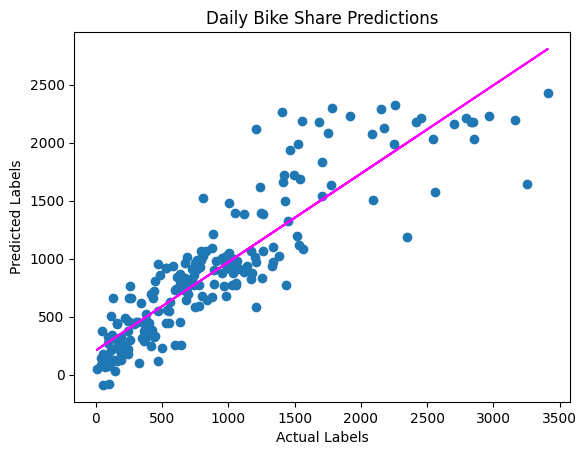

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Gunakan Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Mencoba beberapa nilai hyperparameter
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# mencari kombinasi hyperparameter terbaik untuk mengoptimalkan metrik R2
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Dapatkan model estimator terbaik
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluasi model menggunakan test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Visualisasikan dengan grafik plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# overlay garis regresi
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

> **Catatan**: Penggunaan nilai acak dalam Gradient Boosting algorithm selalu menghasilkan metrik yang sedikit berbeda. Dalam kasus ini, model terbaik yang dihasilkan oleh penyetelan hyperparameter tidak mungkin secara signifikan lebih baik daripada model yang dilatih dengan nilai hyperparameter default; tetapi masih berguna untuk mengetahui tentang teknik penyetelan hyperparameter!
 
## Praproses Data
 
Kita melatih model dengan data yang dimuat langsung dari file sumber dengan hanya hasil yang cukup.
 
Dalam praktiknya, biasanya dilakukan beberapa pra-pemrosesan data untuk memudahkan penyesuaian algoritma dengan model. Ada banyak sekali transformasi prapemrosesan yang dapat kita lakukan untuk menyiapkan pemodelan data, tetapi kita akan berfokus pada beberapa teknik umum:
 
### Menskalakan fitur numerik

Menormalkan fitur numerik sehingga memiliki skala yang sama dengan mencegah fitur numerik bernilai besar dari koefisien yang tidak proporsional mempengaruhi prediksi. Misalnya, data kita menyertakan fitur numerik berikut:
 
| A |  B  |  C  |
| - | --- | --- |
| 3 | 480 | 65  |
    
Menormalkan fitur numierik ini ke skala yang sama dapat menghasilkan nilai berikut (dengan asumsi A berisi nilai dari 0 hingga 10, B berisi nilai dari 0 hingga 1000, dan C berisi nilai dari 0 hingga 100):
 
|  A  |  B  |  C  |
| --  | --- | --- |
| 0.3 | 0.48| 0.65|
 
Ada beberapa cara kita dapat menskalakan data numerik, seperti menghitung nilai minimum dan maksimum untuk setiap kolom dan menetapkan nilai proporsional antara 0 dan 1, atau dengan menggunakan mean dan standar deviasi dari variabel terdistribusi normal untuk mempertahankan *sebaran* nilai pada skala yang berbeda.
 
### Mengkodekan variabel kategorikal
 
Model Machine learning bekerja paling baik dengan fitur numerik daripada nilai teks, jadi kita biasanya perlu mengonversi fitur kategorikal menjadi representasi numerik. Misalnya, data kita menyertakan fitur kategoris berikut. 
 
| Size |
| ---- |
|  S   |
|  M   |
|  L   |
 
Kita dapat menerapkan *pengkodean ordinal* untuk mengganti nilai integer unik untuk setiap kategori, seperti ini:
 
| Size |
| ---- |
|  0   |
|  1   |
|  2   |
 
Teknik umum lainnya adalah menggunakan *one hot encoding* untuk membuat fitur biner (0 atau 1) individual untuk setiap kemungkinan nilai kategori. Misalnya, kita dapat menggunakan enkode one-hot untuk menerjemahkan kategori yang mungkin ke dalam kolom biner seperti ini:
 
|  Size_S  |  Size_M  |  Size_L  |
| -------  | -------- | -------- |
|    1     |     0    |    0     |
|    0     |     1    |    0     |
|    0     |     0    |    1     |
 
Untuk menerapkan transformasi prapemrosesan ini ke persewaan sepeda, kita akan menggunakan fitur Scikit-Learn bernama *pipelines*. Ini memungkinkan kita untuk mendefinisikan satu set langkah-langkah preprocessing yang diakhiri dengan suatu algoritma. kita kemudian dapat memasukkan seluruh *pipelines* ke data, sehingga model merangkum semua langkah prapemrosesan serta algoritma regresi. Ketika kita ingin menggunakan model untuk memprediksi nilai dari data baru, kita perlu menerapkan transformasi yang sama (berdasarkan distribusi statistik yang sama dan pengkodean kategori yang digunakan dengan data pelatihan).
 
>**Catatan**: Istilah *pipeline* digunakan secara luas dalam machine learning dan, sering kali memiliki arti yang sangat berbeda! Dalam konteks ini, kita menggunakannya untuk merujuk ke objek pipeline di Scikit-Learn, tetapi kita mungkin menggunakannya di tempat lain untuk konteks yang lain.

In [21]:
# Jalankan model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# definisikan praproses untuk kolom numerik (diskalakan)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# definisikan praproses untuk fitur kategoris (dikodekan)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# gabungkan seluruh praproses
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# buat praproses dan latih pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# sesuaikan  pipeline untuk melatih model regresi linier pada set pelatihan
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


Model sudah dilatih termasuk langkah praproses. mari kita validasikan

MSE: 105253.77011310126
RMSE: 324.42837439579984
R2: 0.7936565898032821


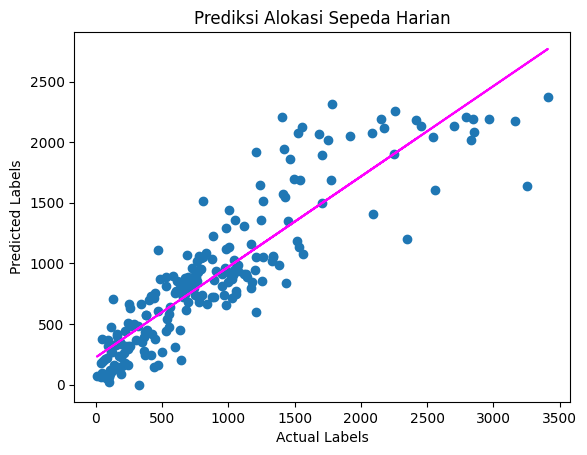

In [22]:
# dapatkan prediksi
predictions = model.predict(X_test)

# tampilkan metriks
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# visualisasikan grafik plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Prediksi Alokasi Sepeda Harian')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Kita telah melihat beberapa teknik umum untuk melatih model prediktif untuk regresi. Pada real projects kita perlu mencoba berberapa algoritma, hyperparameters, dan transformasi praproses. Untuk saat ini kita mendapatkan gambaran umumnya saja. Selanjutnya, mari kita eksplorasi model yang telah terlatih tadi dengan data baru.

### Gunakan data terlatih

Pertama, mari kita simpan model yang terlatih tadi.

In [23]:
import joblib

# simpan model menjadi file pickle
filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

Sekarang, kita load datanya dan gunakan data tersebut untuk memprediksi label-label pada data baru. Teknik ini disebut juga *scoring* atau *inferencing*.

In [24]:
# Load model dari file
loaded_model = joblib.load(filename)

# Buat array numpy yang berisi pengamatan baru (misalnya informasi prakiraan musiman dan cuaca besok)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Gunakan model untuk memprediksi persewaan besok
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 122 rentals


Metode **predict** model menerima serangkaian pengamatan, sehingga kita dapat menggunakannya untuk menghasilkan beberapa prediksi sebagai batch. Misalnya, kita memiliki ramalan cuaca untuk lima hari ke depan; kita dapat menggunakan model ini untuk memprediksi penyewaan sepeda untuk setiap hari berdasarkan kondisi cuaca yang diharapkan.

In [25]:
# Berbagai fitur berdasarkan ramalan cuaca lima hari
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Gunakan model untuk memprediksi persewaan
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
493.0
929.0
428.0
462.0
491.0


## Rangkuman

Kita telah menjalankan regresi yang kompleks, menyetelnya, menyimpan model, dan menggunakannya untuk memprediksi jumlah sewa di masa depan.